KNN
Features: Energy, Dots, Edges

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/Machine Learning/Edge&Line_Detection"

/content/drive/MyDrive/Machine Learning/Edge&Line_Detection


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import glob
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import time

In [ ]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()

In [ ]:
# 0 = crazing 
# 1 = inclusion
# 2 = patches
# 3 = pitted_surface
# 4 = rolled in scale
# 5 = scratches

In [ ]:
dataset = pd.read_csv('train_features_extracted.csv')

In [ ]:
dataset

,Class,Energy,Dots,Lines,contours,Edges,Corners
0,crazing,153.854106,339,2,2,12857,2
1,crazing,98.900338,288,2,2,8345,2
2,crazing,122.753619,327,2,2,10913,2
3,crazing,110.394338,379,2,2,9927,2
4,crazing,135.667513,266,2,2,11858,2
...,...,...,...,...,...,...,...
1435,scratches,9.140425,61,2,2,70,2
1436,scratches,14.365756,0,2,2,808,2
1437,scratches,9.262863,3,2,2,721,2
1438,scratches,17.461644,0,2,2,975,2


In [ ]:
x = dataset.iloc[:, [1,2,5]].values

In [ ]:
x

array([[1.53854106e+02, 3.39000000e+02, 1.28570000e+04],
       [9.89003375e+01, 2.88000000e+02, 8.34500000e+03],
       [1.22753619e+02, 3.27000000e+02, 1.09130000e+04],
       ...,
       [9.26286250e+00, 3.00000000e+00, 7.21000000e+02],
       [1.74616438e+01, 0.00000000e+00, 9.75000000e+02],
       [1.08811813e+01, 6.00000000e+00, 6.02000000e+02]])

In [ ]:
x[0]

array([  153.85410625,   339.        , 12857.        ])

In [ ]:
X_train = x 

In [ ]:
print(len(X_train))

1440


In [ ]:
for j in range(0,6):
    for i in range(0,240):
        y_train.append(j)

In [ ]:
print(y_train)
print(len(y_train))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
dataset2 = pd.read_csv('test_features_extracted.csv')

In [ ]:
x = dataset2.iloc[:, [1,2,5]].values

In [ ]:
print(x)

[[1.46419744e+02 3.14000000e+02 1.21900000e+04]
 [1.35537719e+02 2.28000000e+02 1.15250000e+04]
 [1.52394050e+02 2.91000000e+02 1.23890000e+04]
 ...
 [2.44281188e+01 1.40000000e+01 1.00100000e+03]
 [3.19947250e+01 3.00000000e+00 9.37000000e+02]
 [2.13497813e+01 7.00000000e+00 7.43000000e+02]]


In [ ]:
print(len(x))

360


In [ ]:
X_test = x

In [ ]:
for j in range(0,6):
    for i in range(0,60):
        y_test.append(j)

In [ ]:
print(len(y_test))

360


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1440, 3) (1440,)
Test set: (360, 3) (360,)


In [ ]:
nsamples, nx = X_train.shape
X_train = X_train.reshape((nsamples,nx))

In [ ]:
print(X_train.shape)

(1440, 3)


In [ ]:
nsamples, nx = X_test.shape
X_test = X_test.reshape((nsamples,nx))

In [ ]:
print(X_test.shape)

(360, 3)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [ ]:
train_accuracy = list()
test_accuracy = list()
k_value = list()

In [ ]:

for k in range(1,101,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # print(metrics.accuracy_score(y_test, y_pred_test))
    # print(confusion_matrix(y_test, y_pred_test))
    # print(classification_report(y_test,y_pred_test))
    k_value.append(k)
    train_accuracy.append((metrics.accuracy_score(y_train, y_pred)))
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))


In [ ]:
print(train_accuracy)
print(test_accuracy)
print(k_value)

[1.0, 0.8847222222222222, 0.8486111111111111, 0.8263888888888888, 0.8097222222222222, 0.8069444444444445, 0.7986111111111112, 0.7916666666666666, 0.7798611111111111, 0.78125, 0.7694444444444445, 0.7625, 0.7625, 0.7590277777777777, 0.75, 0.7486111111111111, 0.7416666666666667, 0.7388888888888889, 0.7354166666666667, 0.7354166666666667, 0.7354166666666667, 0.7333333333333333, 0.73125, 0.7340277777777777, 0.7305555555555555, 0.7326388888888888, 0.7277777777777777, 0.7270833333333333, 0.7256944444444444, 0.7270833333333333, 0.7243055555555555, 0.7291666666666666, 0.7270833333333333, 0.7270833333333333, 0.725, 0.7277777777777777, 0.7291666666666666, 0.7284722222222222, 0.7256944444444444, 0.725, 0.7222222222222222, 0.7138888888888889, 0.7145833333333333, 0.7104166666666667, 0.7111111111111111, 0.7131944444444445, 0.7104166666666667, 0.7090277777777778, 0.7076388888888889, 0.7076388888888889]
[0.7611111111111111, 0.7916666666666666, 0.7805555555555556, 0.7611111111111111, 0.7611111111111111,

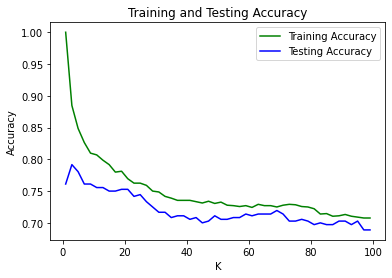

In [ ]:
plt.plot(k_value, train_accuracy, 'g', label='Training Accuracy')
plt.plot(k_value, test_accuracy, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_begin = time.time()
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
train_end = time.time()
train_time = train_end - train_begin


time.sleep(5)
y_pred=knn.predict(X_train)
test_begin = time.time()
y_pred_test = knn.predict(X_test)
test_end = time.time()
test_time = test_end - test_begin

print(metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

0.7916666666666666
[[54  0  5  0  1  0]
 [ 0 45  0 14  0  1]
 [ 5  0 47  6  1  1]
 [11  4  9 24  2 10]
 [ 0  0  0  0 60  0]
 [ 0  0  0  5  0 55]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        60
           1       0.92      0.75      0.83        60
           2       0.77      0.78      0.78        60
           3       0.49      0.40      0.44        60
           4       0.94      1.00      0.97        60
           5       0.82      0.92      0.87        60

    accuracy                           0.79       360
   macro avg       0.78      0.79      0.78       360
weighted avg       0.78      0.79      0.78       360



In [ ]:
print(train_time)
print(test_time/len(X_test))

0.0012111663818359375
3.238850169711643e-05


In [ ]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix.diagonal()/matrix.sum(axis=1)


array([0.9       , 0.75      , 0.78333333, 0.4       , 1.        ,
       0.91666667])

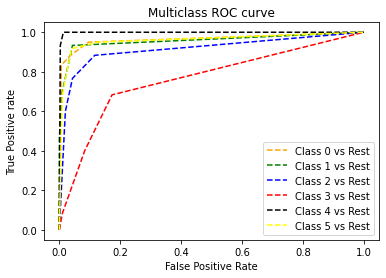

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_prob = knn.predict_proba(X_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)


# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  